In [45]:
import numpy as np
import pandas as pd
import torch

In [46]:
# Import data
features = pd.read_csv('temps.csv')

In [47]:
# Time data
import datetime

year = features['year']
month = features['month']
day = features['day']

dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) 
         for year, month, day in zip(year, month, day)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]

In [48]:
# OneHot
features = pd.get_dummies(features)

In [49]:
# Labels
labels = np.array(features['actual'])
features = features.drop('actual', axis = 1)

In [50]:
# Standardization to np array
from sklearn import preprocessing
input_features = preprocessing.StandardScaler().fit_transform(features)

In [51]:
# Parameters
input_dim = input_features.shape[1]
hidden_dim = 128
output_dim = 1
learning_rate = 0.01
batch_size = 18

In [52]:
# Layer
my_nn = torch.nn.Sequential(torch.nn.Linear(input_dim, hidden_dim),
                           torch.nn.Sigmoid(),
                           torch.nn.Linear(hidden_dim, output_dim))

In [53]:
# Optimizer and loss
optimizer = torch.optim.Adam(my_nn.parameters(), lr = learning_rate)
cost = torch.nn.MSELoss()

In [55]:
# Train model
total_loss = []

for i in range(1000):
    batch_loss = []
    for start in range(0, len(input_features), batch_size):
        end = (start + batch_size) if (start + batch_size) < len(input_features) else len(input_features)
        xx = torch.tensor(input_features[start: end], dtype = torch.float, requires_grad = True)
        yy = torch.tensor(labels[start: end], dtype = torch.float, requires_grad = True)
        prediction = my_nn(xx)
        loss = cost(prediction, yy)
        optimizer.zero_grad()
        
        # Backward propagation
        loss.backward(retain_graph = True)
        optimizer.step()
        batch_loss.append(loss.data.numpy())
    
    if i%100==0:
        total_loss.append(np.mean(batch_loss))
        print('Iteration: {}, batch_loss: {}'.format(i, loss))

Iteration: 0, batch_loss: 481.16790771484375
Iteration: 100, batch_loss: 30.970455169677734
Iteration: 200, batch_loss: 31.797393798828125
Iteration: 300, batch_loss: 39.1842041015625
Iteration: 400, batch_loss: 30.62451171875
Iteration: 500, batch_loss: 29.464881896972656
Iteration: 600, batch_loss: 32.7364387512207
Iteration: 700, batch_loss: 34.843231201171875
Iteration: 800, batch_loss: 29.406415939331055
Iteration: 900, batch_loss: 31.295780181884766


In [57]:
x = torch.tensor(input_features, dtype = torch.float)
test_predictions = my_nn(x).data.numpy()

In [59]:
import matplotlib.pyplot as plt

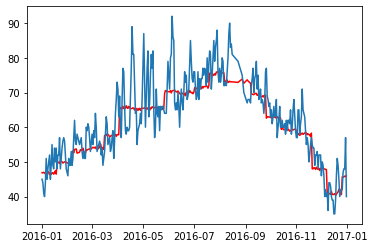

In [69]:
plt.plot(dates, test_predictions, color = 'r')
plt.plot(dates, labels)